In [15]:
import pandas as pd

#0=54 V, 1=54.5 V, 2=55 V, 3=55.5 V, 4=56 V, 5=56.5 V, 6=57 V

hl = 3
        
df = pd.read_csv('adj55.5v.CSV', sep=';')
masks = pd.read_csv('masks.csv', delimiter=';')

df['Counts'] = df['Counts'].replace(0, 1)

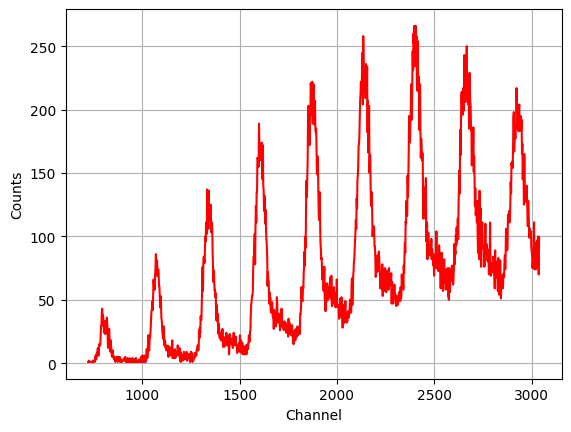

In [16]:
import matplotlib.pyplot as plt
import numpy as np

#plot the histogram
fig, ax = plt.subplots()
ax.plot(df['Channel'], df['Counts'], 'r-')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [17]:
yerr = np.sqrt(df['Counts'])

In [18]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm

def func(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3, mu4, sigma4, A4, mu5, sigma5, A5, mu6, sigma6, A6, mu7, sigma7, A7, mu8, sigma8, A8, mu9, sigma9, A9, muB, sigmaB, B):
    return A1 * norm.pdf(x, mu1, sigma1) + A2 * norm.pdf(x, mu2, sigma2) + A3 * norm.pdf(x, mu3, sigma3) + A4 * norm.pdf(x, mu4, sigma4) + A5 * norm.pdf(x, mu5, sigma5) + A6 * norm.pdf(x, mu6, sigma6) + A7 * norm.pdf(x, mu7, sigma7) + A8 * norm.pdf(x, mu8, sigma8) + A9 * norm.pdf(x, mu9, sigma9) + B * norm.pdf(x, muB, sigmaB)

ls = LeastSquares(df['Channel'], df['Counts'], yerr, func)
m = Minuit(ls, mu1=masks['Media1'][hl], sigma1=20, A1=masks['A1'][hl], mu2=masks['Media2'][hl], sigma2=20, A2=masks['A2'][hl], mu3=masks['Media3'][hl], sigma3=20, A3=masks['A3'][hl], mu4=masks['Media4'][hl], sigma4=20, A4=masks['A4'][hl], mu5=masks['Media5'][hl], sigma5=20, A5=masks['A5'][hl], mu6=masks['Media6'][hl], sigma6=20, A6=masks['A6'][hl], mu7=masks['Media7'][hl], sigma7=20, A7=masks['A7'][hl], mu8=masks['Media8'][hl], sigma8=20, A8=masks['A8'][hl], mu9=masks['Media9'][hl], sigma9=20, A9=masks['A9'][hl], muB=masks['MediaB'][hl], sigmaB=1000, B=masks['AB'][hl])
m.values['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
ls.mask = (df['Channel'] > masks['Left1'][hl]) & (df['Channel'] < masks['Right1'][hl])
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left2'][hl]) & (df['Channel'] < masks['Right2'][hl])
m.values['A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left3'][hl]) & (df['Channel'] < masks['Right3'][hl])
m.values['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left4'][hl]) & (df['Channel'] < masks['Right4'][hl])
m.values['A5', 'A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left5'][hl]) & (df['Channel'] < masks['Right5'][hl])
m.values['A6', 'A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left6'][hl]) & (df['Channel'] < masks['Right6'][hl])
m.values['A7', 'A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left7'][hl]) & (df['Channel'] < masks['Right7'][hl])
m.values['A8', 'A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left8'][hl]) & (df['Channel'] < masks['Right8'][hl])
m.values['A9', 'B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu9', 'sigma9', 'A9', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()

ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > masks['Left9'][hl]) & (df['Channel'] < masks['Right9'][hl])
m.values['B'] = 0
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'muB', 'sigmaB', 'B'] = True
m.migrad()
m.hesse()


ls.mask = None
m.fixed = False
ls.mask = (df['Channel'] > 1500)
m.fixed['mu1', 'sigma1', 'A1', 'mu2', 'sigma2', 'A2', 'mu3', 'sigma3', 'A3', 'mu4', 'sigma4', 'A4', 'mu5', 'sigma5', 'A5', 'mu6', 'sigma6', 'A6', 'mu7', 'sigma7', 'A7', 'mu8', 'sigma8', 'A8', 'mu9', 'sigma9', 'A9'] = True
m.migrad()
m.hesse()


ls.mask = None
m.fixed = False
m.migrad()
m.hesse()
display(m)
print(m.values)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2057 (χ²/ndof = 1.8)       │             Nfcn = 4011              │
│ EDM = 9.68e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu1    │   805.4   │    0.8    │            │            │         │         │       │
│ 1 │ sigma1 │   20.7    │    0.7    │            │            │         │         │       │
│ 2 │ A1     │  1.62e3   │  0.06e3   │            │            │         │         │       │
│ 3 │ mu2    │ 1.0735e3  │ 0.0006e3  │            │            │         │         │       │
│ 4 │ sigma2 │   20.7    │    0.5    │            │            │         │         │       │
│ 5 │ A2     │  3.74e3   │  0.09e3   │            │            │         │         │       │
│ 6 │ mu3    │ 1.3416e3  │ 0.0005e3  │            │            │         │         │       │
│ 7 │ sigma3 │   24.5    │    0.4    │            │            │         │         │       │
│ 8 │ A3     │  7.03e3   │  0.13e3   │            │            │         │         │       │
│ 9 │ mu4    │ 1.6080e3  │ 0.0005e3  │            │            │         │         │       │
│ 10│ sigma4 │   25.4    │    0.4    │            │            │         │         │       │
│ 11│ A4     │  9.81e3   │  0.16e3   │            │            │         │         │       │
│ 12│ mu5    │ 1.8754e3  │ 0.0005e3  │            │            │         │         │       │
│ 13│ sigma5 │   27.3    │    0.4    │            │            │         │         │       │
│ 14│ A5     │  12.59e3  │  0.20e3   │            │            │         │         │       │
│ 15│ mu6    │ 2.1401e3  │ 0.0005e3  │            │            │         │         │       │
│ 16│ sigma6 │   28.4    │    0.5    │            │            │         │         │       │
│ 17│ A6     │  13.19e3  │  0.23e3   │            │            │         │         │       │
│ 18│ mu7    │ 2.4042e3  │ 0.0006e3  │            │            │         │         │       │
│ 19│ sigma7 │   28.8    │    0.5    │            │            │         │         │       │
│ 20│ A7     │  13.24e3  │  0.24e3   │            │            │         │         │       │
│ 21│ mu8    │ 2.6685e3  │ 0.0007e3  │            │            │         │         │       │
│ 22│ sigma8 │   29.8    │    0.6    │            │            │         │         │       │
│ 23│ A8     │  11.34e3  │  0.25e3   │            │            │         │         │       │
│ 24│ mu9    │ 2.9331e3  │ 0.0009e3  │            │            │         │         │       │
│ 25│ sigma9 │   32.6    │    0.9    │            │            │         │         │       │
│ 26│ A9     │  10.04e3  │  0.32e3   │            │            │         │         │       │
│ 27│ muB    │  2.741e3  │  0.018e3  │            │            │         │         │       │
│ 28│ sigmaB │    656    │     9     │            │            │         │         │       │
│ 29│ B      │  125.8e3  │   2.6e3   │            │            │         │         │       │
└───┴────────┴─────

<ValueView mu1=805.3566950056241 sigma1=20.658793413085082 A1=1620.8423635461604 mu2=1073.5283461372846 sigma2=20.69973077257044 A2=3737.0728714384595 mu3=1341.5747377178222 sigma3=24.489636703871742 A3=7030.137146886038 mu4=1608.0414038521662 sigma4=25.37378813961122 A4=9814.99758950639 mu5=1875.409712269793 sigma5=27.284282848482412 A5=12588.390793138944 mu6=2140.095850254243 sigma6=28.378653371687083 A6=13194.016123718571 mu7=2404.1586825853938 sigma7=28.774746091104095 A7=13243.832698637529 mu8=2668.492356187481 sigma8=29.79424673631615 A8=11339.214544562037 mu9=2933.1383385406543 sigma9=32.615883083672834 A9=10044.248950738034 muB=2741.4930383270635 sigmaB=656.1022513999088 B=125846.85931312456>


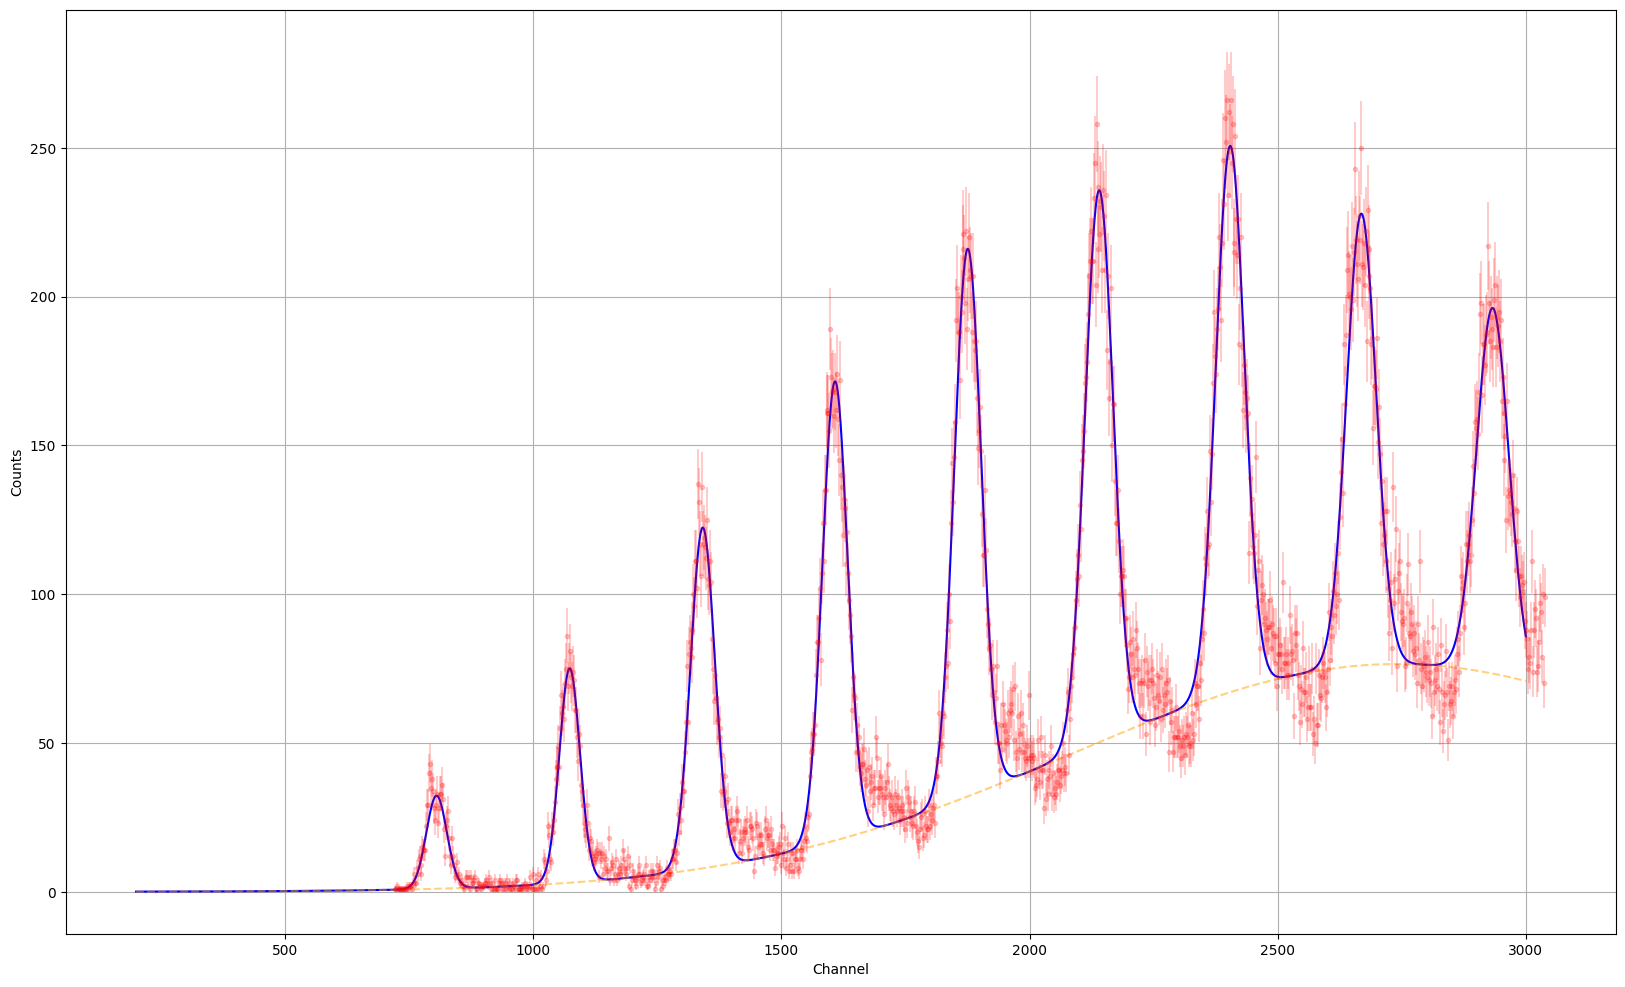

In [19]:
#plotta la funzione
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
x = np.linspace(200, 3000, 10000)
y = func(x, *m.values)
ax.plot(x, y, 'b-')
ax.plot(x, norm.pdf(x, m.values['muB'], m.values['sigmaB'])*m.values['B'], color='orange', linestyle='--', alpha=0.5)
ax.errorbar(df['Channel'], df['Counts'], yerr, fmt='r.', alpha=0.2)
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.grid()
plt.show()

In [20]:
list_deltachannel = np.array([m.values['mu2']-m.values['mu1'], m.values['mu3']-m.values['mu2']]) #complete
list_deltachannel = np.append(list_deltachannel, [m.values['mu4']-m.values['mu3'], m.values['mu5']-m.values['mu4'], m.values['mu6']-m.values['mu5'], m.values['mu7']-m.values['mu6'], m.values['mu8']-m.values['mu7'], m.values['mu9']-m.values['mu8']])

correction_factor = (2*(4*10**(-9)))/(50*(2**12)*32)

gain = np.mean(list_deltachannel)*correction_factor/(1.602*10**(-19))
gain_err = np.std(list_deltachannel)/np.sqrt(len(list_deltachannel))*correction_factor/(1.602*10**(-19))

print('gain =', gain, '+/-', gain_err)
print('convADC =', np.mean(list_deltachannel), '+/-', np.std(list_deltachannel)/np.sqrt(len(list_deltachannel)))

gain = 2026677.3576629583 +/- 4372.795752595438
convADC = 265.97270544187876 +/- 0.5738675237402945


In [24]:
from jax import grad, jacfwd
import jax.numpy as np

def error_prop_jax_gen(q,x,dx):
    jac = jacfwd(q)
    return np.sqrt(np.sum(np.power(jac(x)*dx,2)))

def resolution_function(x):
    return (x[2]-x[0])/np.sqrt(x[3]**2-x[1]**2)

x_=np.array([m.values['mu2'], m.values['sigma2'], m.values['mu3'], m.values['sigma3']])
dx_=np.array([m.errors['mu2'], m.errors['sigma2'], m.errors['mu3'], m.errors['sigma3']])

print('resolution =', resolution_function(x_), '+/-', error_prop_jax_gen(resolution_function, x_, dx_))

resolution = 20.482244 +/- 1.6537675


In [25]:
print(m.values['mu3'], m.errors['mu3'])

1341.5747377178222 0.5022338211453221
